In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# Reading the Dataset and preliminary analysis

In [2]:
df = pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


We remove this column because is nothing more than just a index for the dataset, so not needed for our analysis

In [4]:
df.shape

(607, 11)

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


Because salary is based on the currecy, we will prefer to explore the dataset based on the salary_in_usd, so the data is more uniform

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No null values to deal with, so one problem less to deal with

# Exploring the Dataset

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

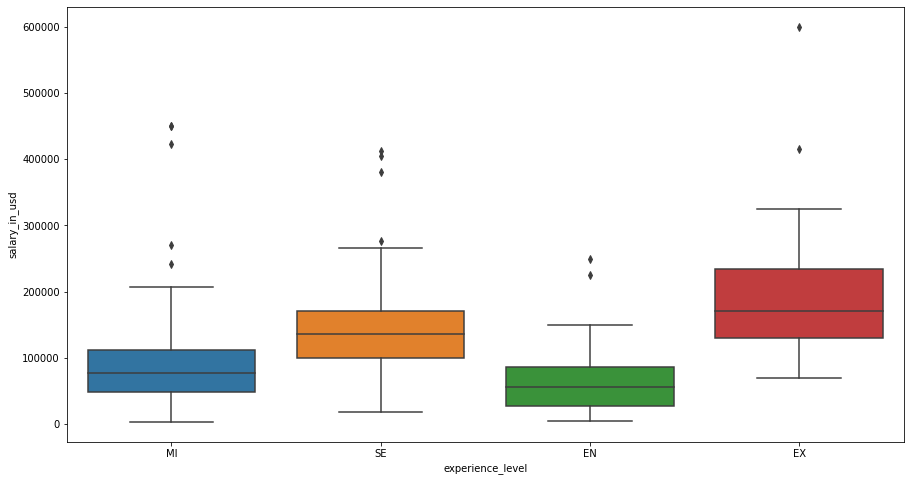

In [7]:
plt.figure(figsize=(15,8))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df)

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

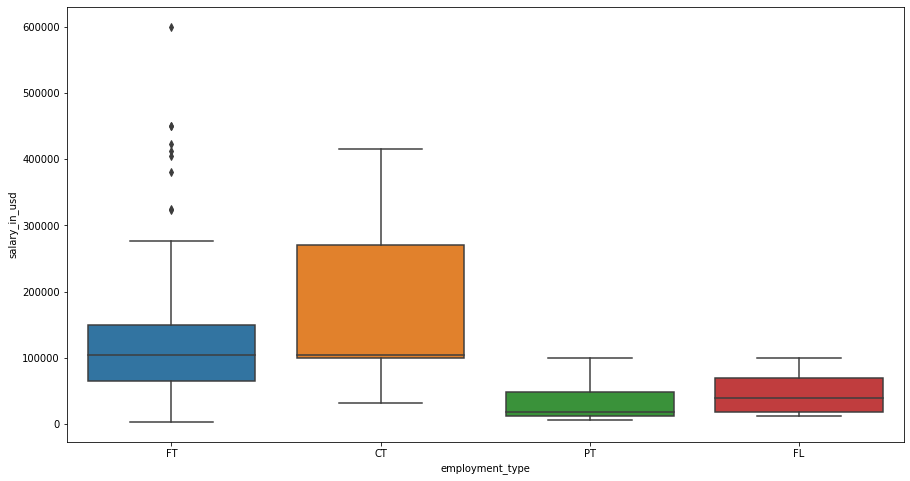

In [8]:
plt.figure(figsize=(15,8))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

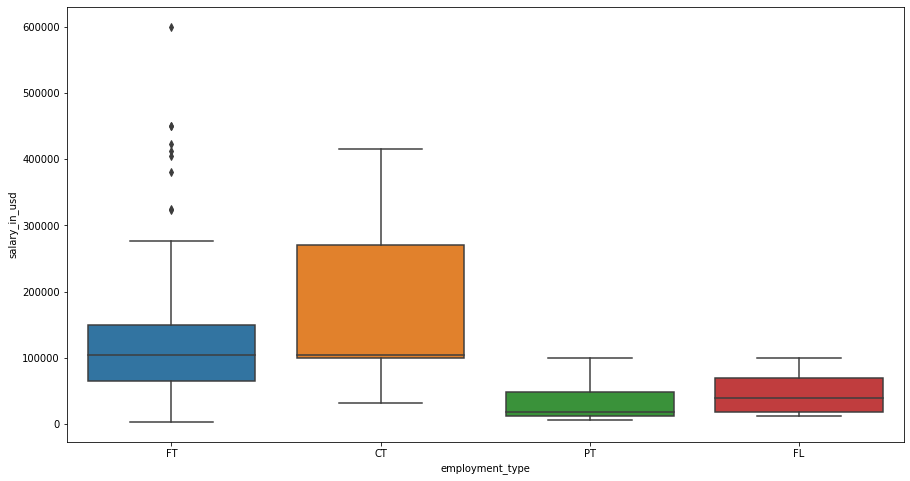

In [9]:
plt.figure(figsize=(15,8))
sns.boxplot(x="employment_type", y="salary_in_usd", data=df)

In [10]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

We have too may job titles, so let's explore the 6 most commons job titles

In [11]:
first_6_job_titles =  df['job_title'].value_counts()[:6].keys()
df_filtered_job_titles = df[df['job_title'].isin(first_6_job_titles)]
df_filtered_job_titles['job_title'].value_counts()

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Name: job_title, dtype: int64

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

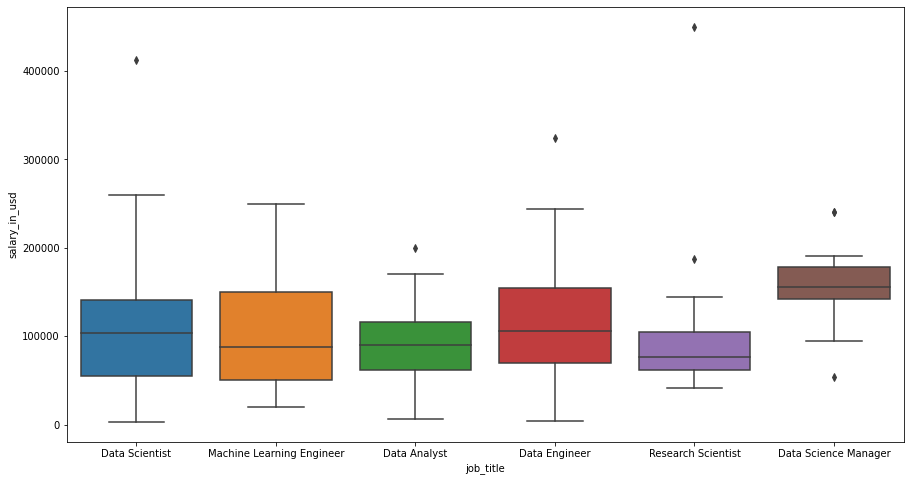

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x="job_title", y="salary_in_usd", data=df_filtered_job_titles)

In [13]:
df['employee_residence'].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

Same process, but for employee residence

<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

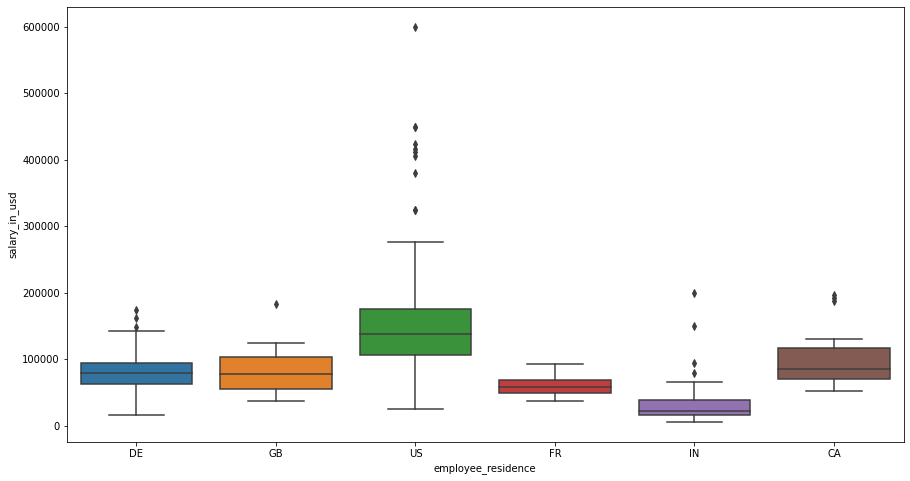

In [14]:
first_6_employee_residence =  df['employee_residence'].value_counts()[:6].keys()
df_filtered_employee_residence = df[df['employee_residence'].isin(first_6_employee_residence)]

plt.figure(figsize=(15,8))
sns.boxplot(x="employee_residence", y="salary_in_usd", data=df_filtered_employee_residence)

In [15]:
df['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

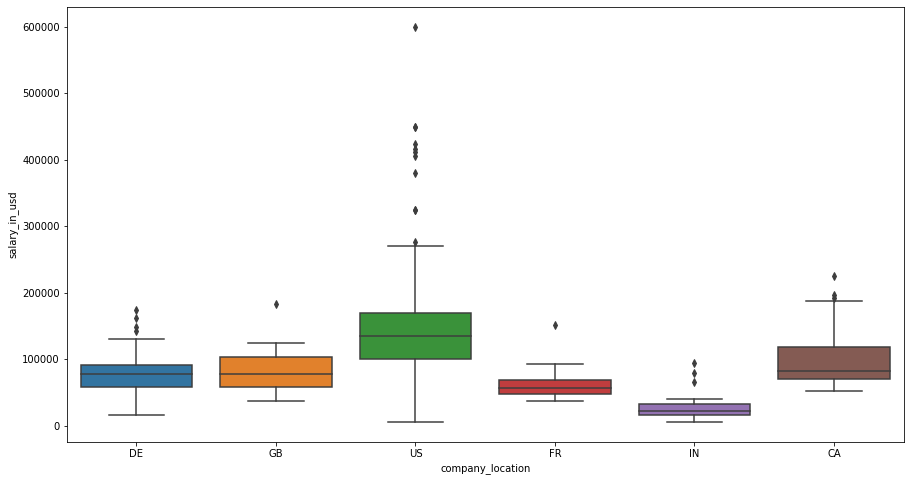

In [16]:
first_6_company_location =  df['company_location'].value_counts()[:6].keys()
df_filtered_company_location = df[df['company_location'].isin(first_6_company_location)]

plt.figure(figsize=(15,8))
sns.boxplot(x="company_location", y="salary_in_usd", data=df_filtered_company_location)

<AxesSubplot:xlabel='salary_currency', ylabel='salary_in_usd'>

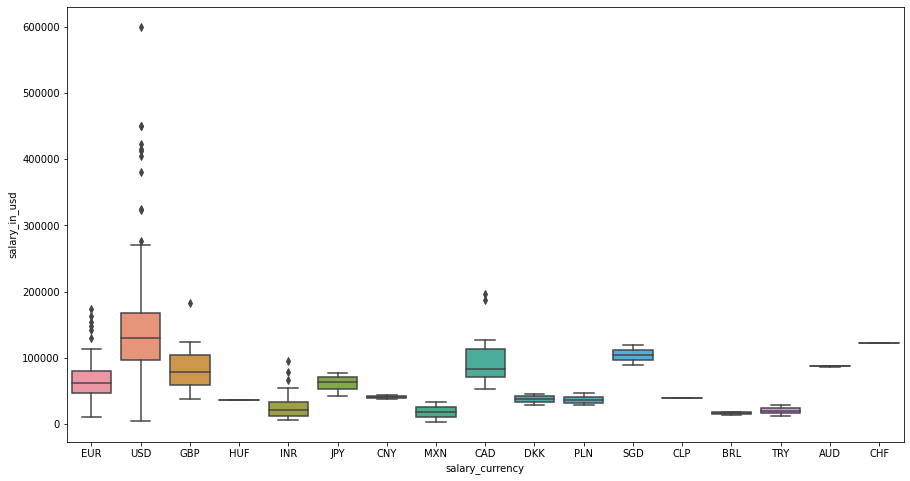

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x="salary_currency", y="salary_in_usd", data=df)

Even with a lot of of values for salary currency, i think is better to see all of them together to understand better the salary variation by currency

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

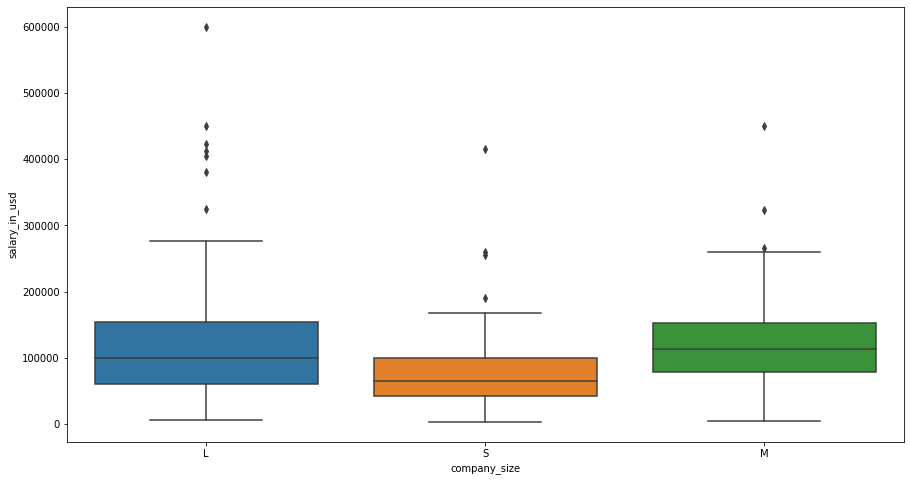

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x="company_size", y="salary_in_usd", data=df)

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

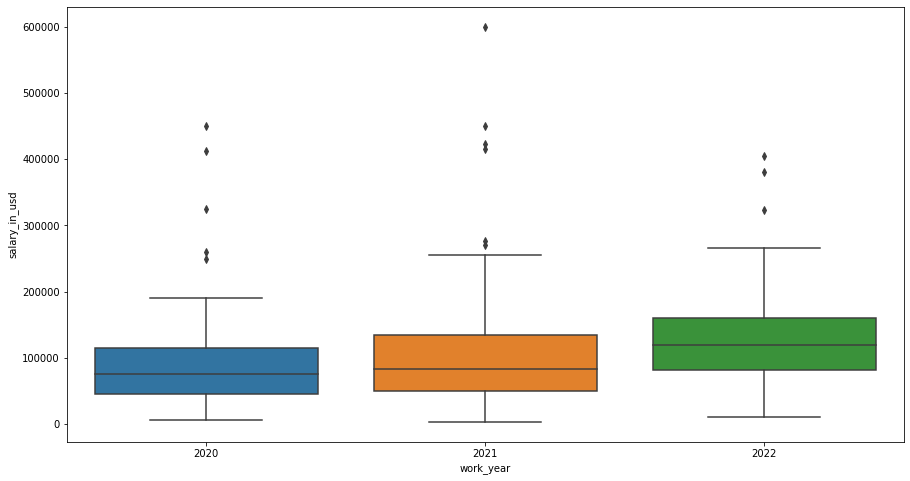

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x="work_year", y="salary_in_usd", data=df)

<Figure size 1080x576 with 0 Axes>

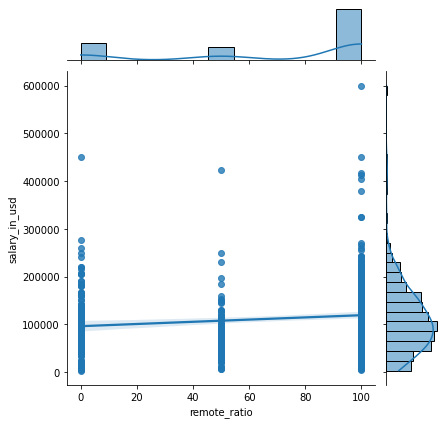

In [20]:
plt.figure(figsize=(15,8))
sns.jointplot(x="remote_ratio", y="salary_in_usd", data=df, kind="reg")

Interesting! My first thought was that this column was more distributed, but looks like is focused on 0, 50 and 100, so we can use the box plot chart to visualize better this feature

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

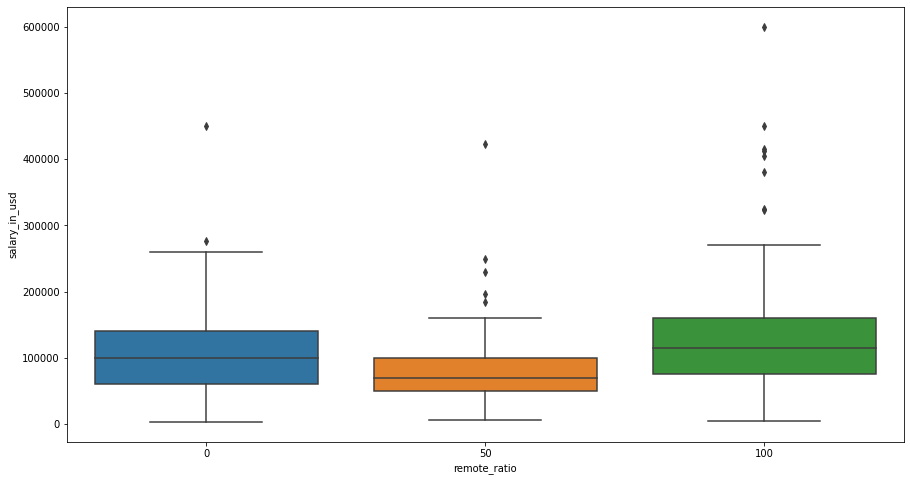

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x="remote_ratio", y="salary_in_usd", data=df)

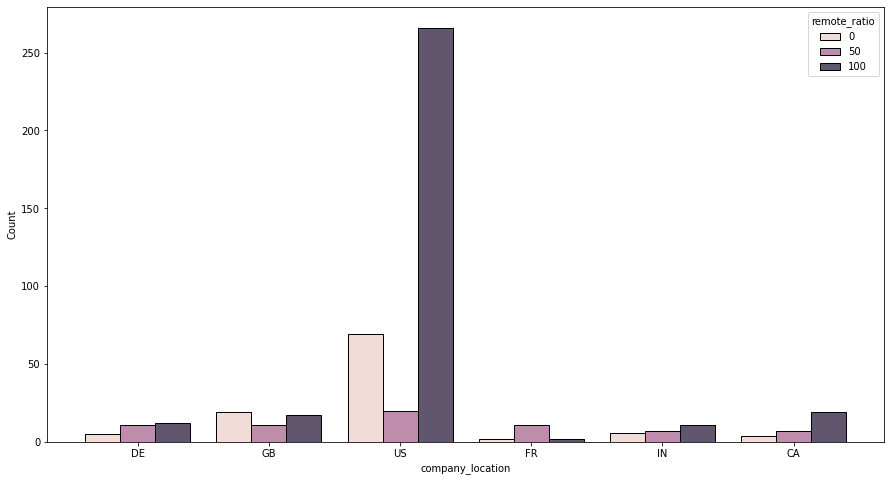

In [22]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="company_location", hue="remote_ratio", data=df_filtered_company_location,multiple="dodge", shrink=.8)

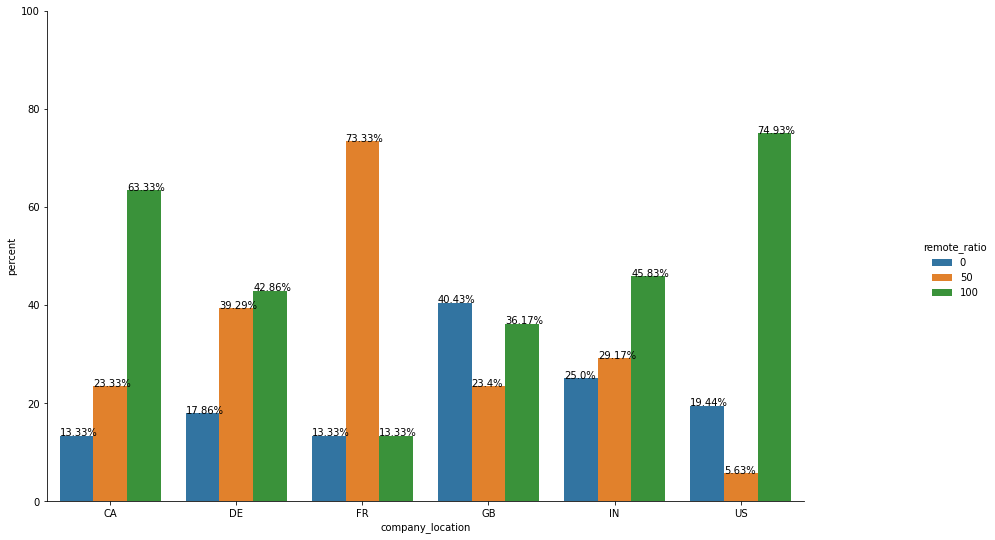

In [23]:
x,y = 'company_location', 'remote_ratio'

g = (df_filtered_company_location
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
g.fig.set_size_inches(15,8)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

This chart show us the proportion of remote work per country, what gives us a great idea of how is distributed this type of work on the selected countries

# Prediction / Regression

I'm a beginner on predictions and regression, and still need to study more, so my results are not the best, so don't mind too much this part.

If you have any suggestion to improve my code, feel free to comment

In [24]:
from sklearn.preprocessing import OneHotEncoder
def category_to_column(df, column, prefix=''):
    df_copy = df.copy()
    oe_style = OneHotEncoder()
    oe_results = oe_style.fit_transform(df_copy[[column]])
    name_columns = prefix + oe_style.categories_[0]
    temp = pd.DataFrame(oe_results.toarray(), columns=name_columns, index=df_copy.index)
    df_copy = pd.concat([df_copy, temp], axis=1)
    return df_copy

In [25]:
columns_category = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
df_v2 = df.copy()
for column in columns_category:
    df_v2 = category_to_column(df_v2, column)
df_v2 = df_v2.drop(columns=columns_category)
df_v2.head()

,work_year,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,EN,EX,MI,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,Data Scientist,70000,79833,DE,0,DE,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,Machine Learning Scientist,260000,260000,JP,0,JP,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,Big Data Engineer,85000,109024,GB,50,GB,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,Product Data Analyst,20000,20000,HN,0,HN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,Machine Learning Engineer,150000,150000,US,50,US,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [26]:
df_v3 = df_v2.drop(columns=['job_title', 'salary', 'employee_residence', 'company_location'])
df_v3.head()

,work_year,salary_in_usd,remote_ratio,EN,EX,MI,SE,CT,FL,FT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,2020,79833,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,260000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2020,109024,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020,20000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2020,150000,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<AxesSubplot:>

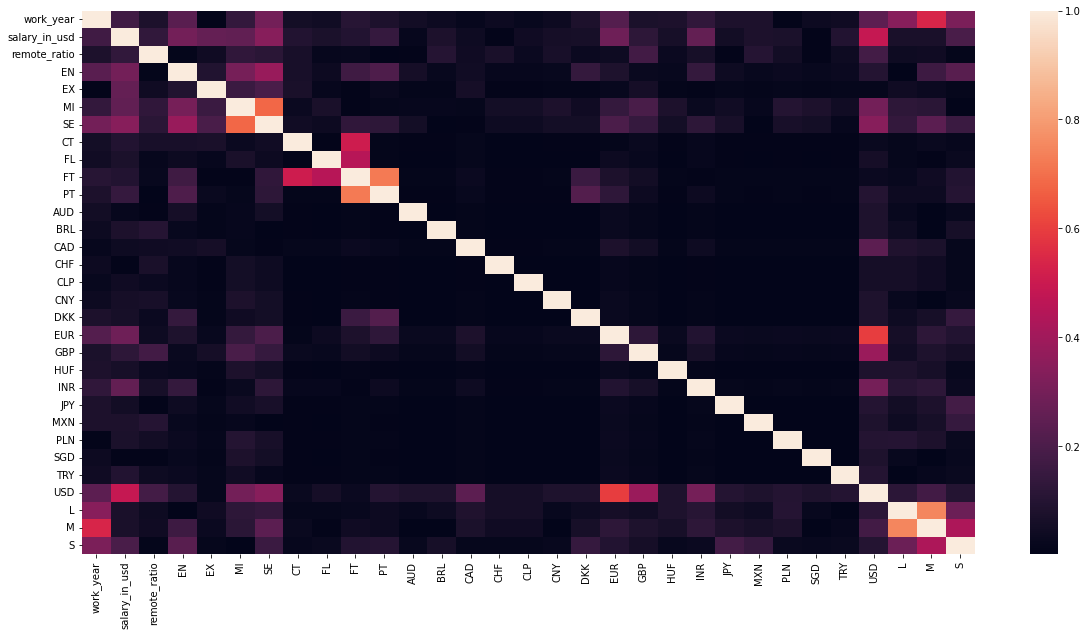

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df_v3.corr().abs())

In [28]:
from sklearn.preprocessing import StandardScaler

feature = df_v3.drop(columns=['salary_in_usd'])
target = df_v3['salary_in_usd']

scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = scaler.transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns=feature.columns, index=feature.index)
feature_scaled.head()

,work_year,remote_ratio,EN,EX,MI,SE,CT,FL,FT,PT,...,INR,JPY,MXN,PLN,SGD,TRY,USD,L,M,S
0,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,1.437239,-1.077099,-0.397991
1,-2.032024,-1.743615,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
2,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,-1.379966,-0.695778,0.928420,-0.397991
3,-2.032024,-1.743615,-0.411773,-0.211543,1.360061,-0.925348,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,-0.695778,-1.077099,2.512619
4,-2.032024,-0.514377,-0.411773,-0.211543,-0.735261,1.080674,-0.091135,-0.081446,0.179758,-0.129423,...,-0.215758,-0.070476,-0.057496,-0.070476,-0.057496,-0.070476,0.724656,1.437239,-1.077099,-0.397991


In [29]:
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
target_scaled[0:5]

array([[-0.45790445],
       [ 2.08328151],
       [-0.04617667],
       [-1.30182581],
       [ 0.53177399]])

In [30]:
# Divide in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled , target_scaled, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.3847537059155601

In [32]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.38325981011167937

In [33]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mean_squared_error(y_test, y_predict)

0.8189975495132173

In [34]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='linear', input_dim=X_train.shape[1]),
     keras.layers.Dense(256 ,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False),
    keras.layers.Dense(1,  kernel_initializer='random_uniform', activation='linear', use_bias=False)
  ])
model.compile(loss='mean_squared_error', optimizer='adam')
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

2022-06-17 14:07:52.018465: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-17 14:07:52.175539: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 0.9144 - val_loss: 0.4716
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6837 - val_loss: 0.3673
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6387 - val_loss: 0.3866
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6171 - val_loss: 0.3926
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6162 - val_loss: 0.3857
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6105 - val_loss: 0.3715
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.4013
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6152 - val_loss: 0.3756
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6155 - val_loss: 0.3821
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6279 - val_loss: 0.4057
Epoch 11

Text(0, 0.5, 'Cost')

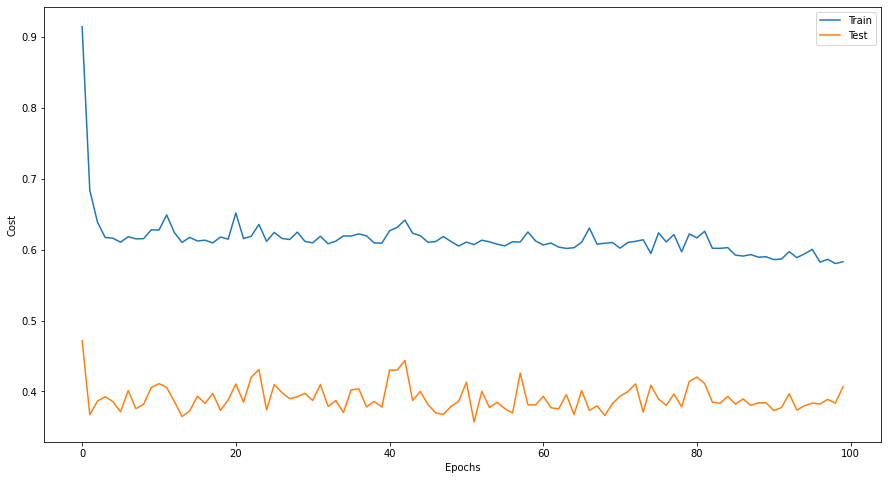

In [35]:
plt.figure(figsize=(15,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Cost')

Not the best results, right? But i will study more and improve this one when i have time

If you have any suggestion or changes, just comment!